In [3]:
from trackeddy.trackeddy import *
from trackeddy.geometryfunc import area_latlon_polygon
import matplotlib.pyplot as plt
import cmocean as cm


In [4]:
path = '../input/dt_global_allsat_phy_l4_20160901.nc'

TEddy = TrackEddy(path=path,variable='sla')

In [5]:

filtered = TEddy._filter_data_(TEddy.rawdata, filter='space')

In [6]:
# %%timeit 
eddies, discarded = TEddy._detect_one_level(filtered, 0.01)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

array([[ 2.26991736e-02],
       [ 3.49375000e+02],
       [-2.38750000e+01]])

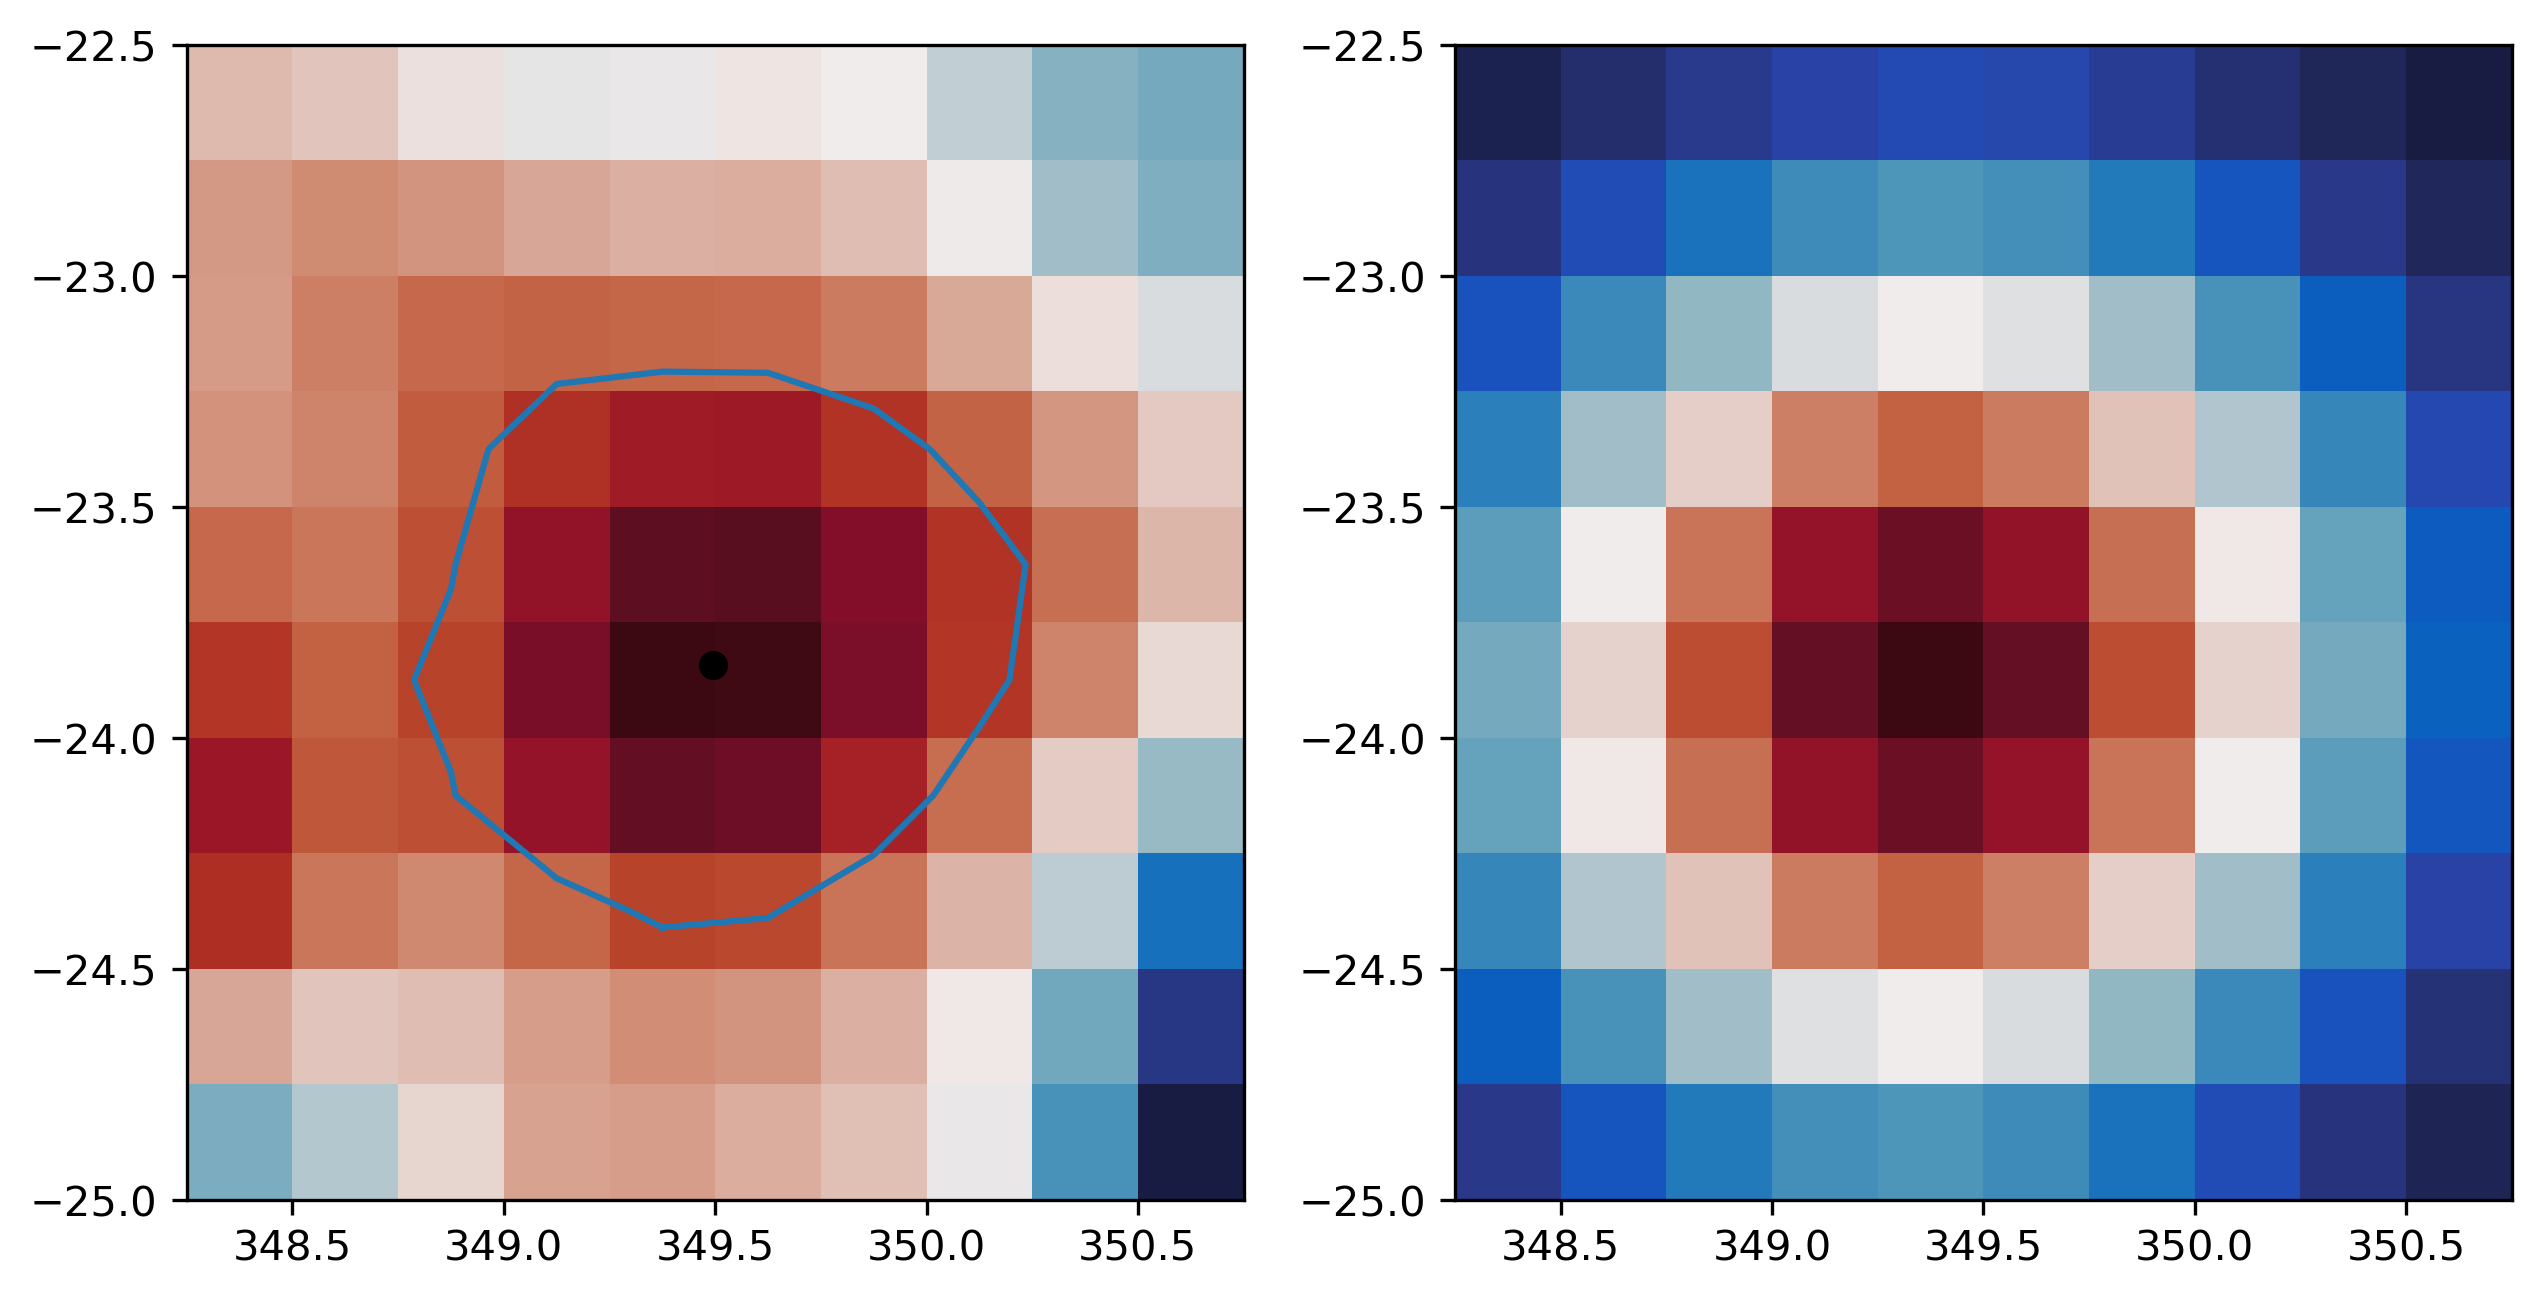

In [9]:
n=100
fig,ax = plt.subplots(1,2,figsize=(10,5),dpi=300)

ax[0].plot(eddies[n].contour[:,0],eddies[n].contour[:,1])

ax[0].plot(eddies[n].contour_center[0],eddies[n].contour_center[1],'ok')

# X,Y = np.meshgrid(eddies[n].contour_center[1].longitude,eddies[n].contour_center[1].latitude)

# x = X[eddies[n].contour_center[2][:,0],eddies[n].contour_center[2][:,1]]
# y = Y[eddies[n].contour_center[2][:,0],eddies[n].contour_center[2][:,1]]

# ax[0].plot(x,y)

ax[0].pcolormesh(eddies[n].data_near_contour.longitude,eddies[n].data_near_contour.latitude,eddies[n].data_near_contour,cmap=cm.cm.balance)

ax[1].pcolormesh(eddies[n].data_near_contour.longitude,eddies[n].data_near_contour.latitude,eddies[n].gaussian,cmap=cm.cm.balance)
# ax[1].contour(eddies[n].data_near_contour.longitude,eddies[n].data_near_contour.latitude,eddies[n].gaussian,level=0.01)

eddies[n].eddy_maxima

In [6]:

mask =  np.zeros(X.shape)
contour = eddies[n].contour_center[2]
# for contour in eddies[n].contour_center[2]:
mask[contour[:,0],contour[:,1]]=1
    
mask = ndimage.binary_fill_holes(mask)

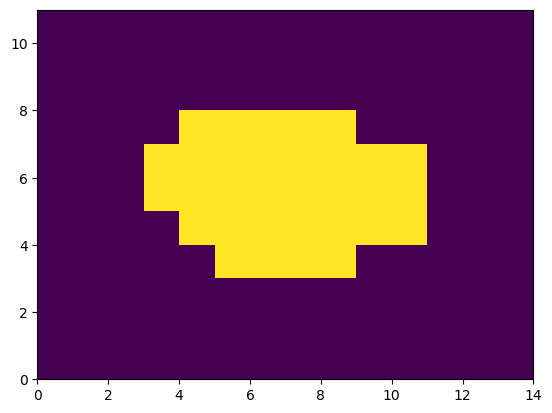

In [7]:
plt.pcolormesh(mask)

In [ ]:
TC = np.max(eddies[n].contour_center[1],axis=0) - [ 1000, 500 ]

(TC > TEddy.X.shape).any()

np.argmax(TC - TEddy.X.shape)
# (TC < (0,0)).any()
while (TC > TEddy.X.shape).any():
    index_max = np.argmax(TC - TEddy.X.shape)
    TC[index_max]=TC[index_max]-1

ValueError: operands could not be broadcast together with shapes (14,) (2,)

In [ ]:
TC

array([-895,  685])

In [ ]:
while (TC < (0,0)).any():
    index_min = np.argmin(TC)
    TC[index_min] = 0

In [ ]:
TC

array([  0, 685])

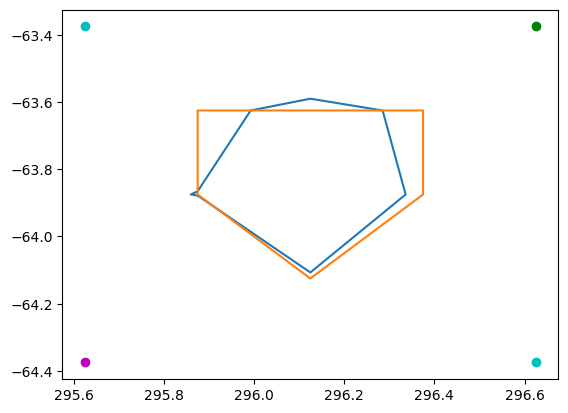

In [ ]:
# n =10
# plt.plot(eddies[n].contour[:,0],eddies[n].contour[:,1])
# x = TEddy.X[eddies[n].contour_center[1][:,0],eddies[n].contour_center[1][:,1]]
# y = TEddy.Y[eddies[n].contour_center[1][:,0],eddies[n].contour_center[1][:,1]]

# plt.plot(x,y)

TC = np.max(eddies[n].contour_center[1],axis=0) + [1, 1 ]

# x = TEddy.X[TC[0],TC[1]]
# y = TEddy.Y[TC[0],TC[1]]

# plt.plot(x,y,'og')

# LC = np.min(eddies[n].contour_center[1],axis=0) - [1, 1]

# x = TEddy.X[LC[0],LC[1]]
# y = TEddy.Y[LC[0],LC[1]]

# plt.plot(x,y,'om')

# x = TEddy.X[TC[0],LC[1]]
# y = TEddy.Y[TC[0],LC[1]]

# plt.plot(x,y,'oc')


# x = TEddy.X[LC[0],TC[1]]
# y = TEddy.Y[LC[0],TC[1]]

# plt.plot(x,y,'oc')


In [ ]:
LC

array([ 103, 1183])

In [ ]:

n=10
eddy_area = area_latlon_polygon(eddies[n].contour)
ellipse_area = area_latlon_polygon(eddies[n].ellipse)

Text(0.5, 1.0, 'Discarded')

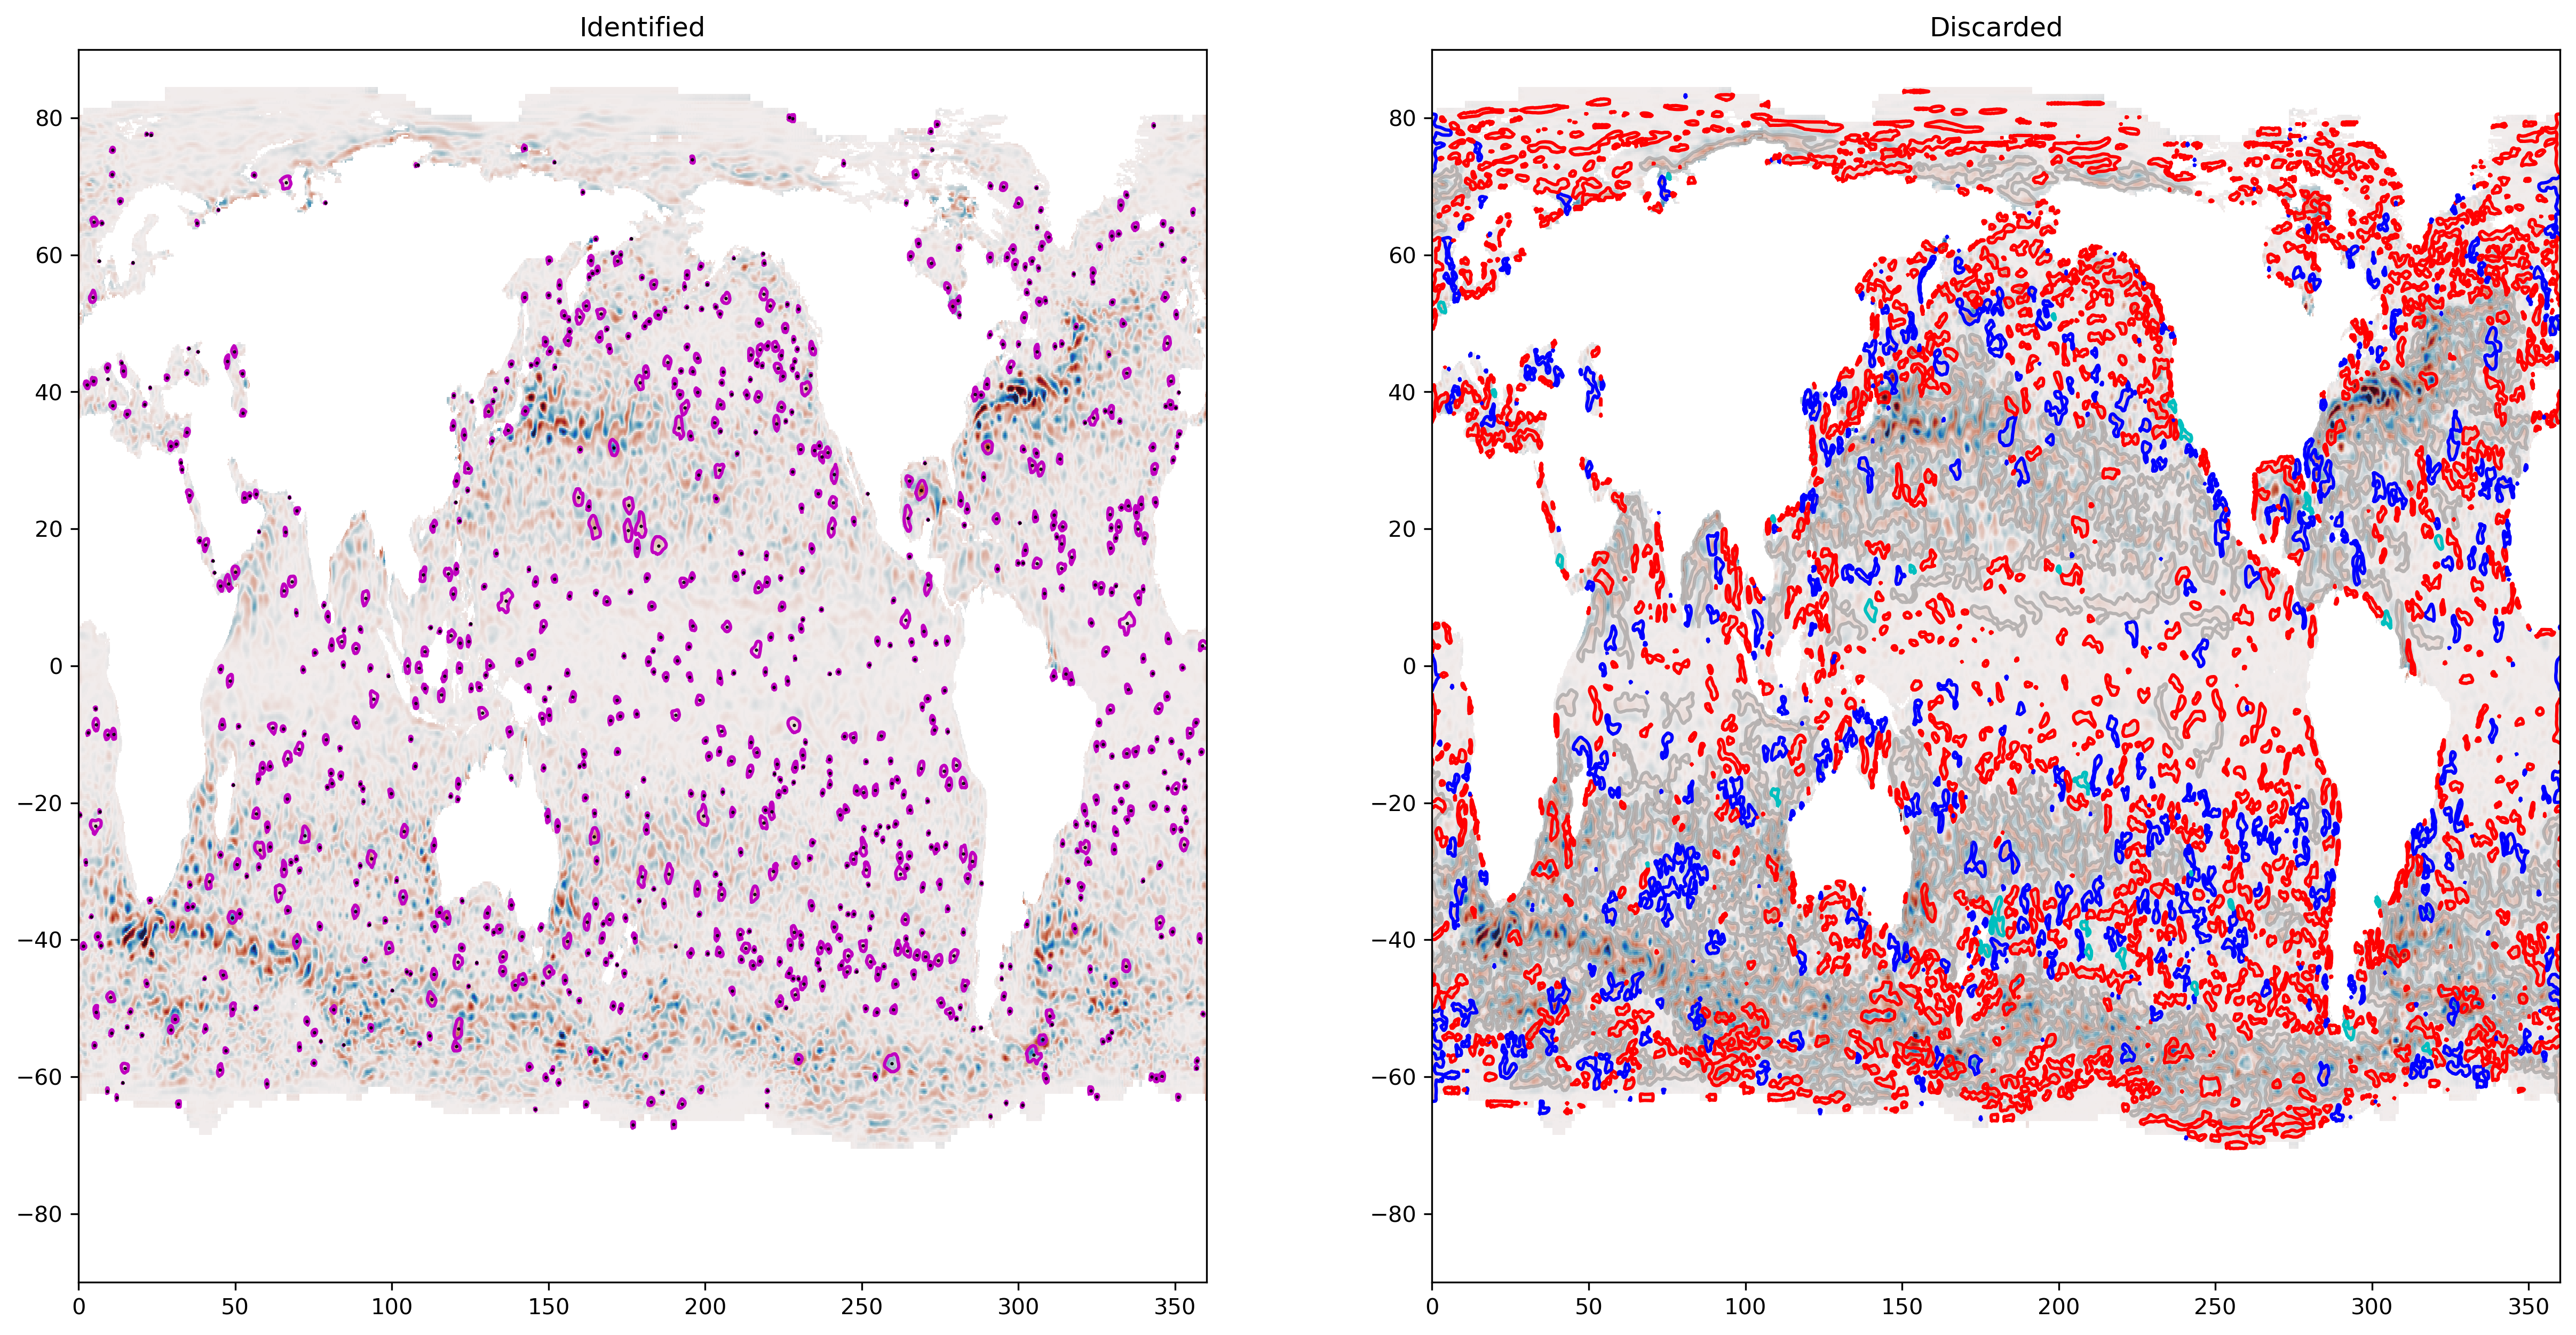

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(20,10),dpi=300)

ax[0].pcolormesh(TEddy.X,TEddy.Y , filtered.squeeze().values,cmap = cm.cm.balance,vmin=-0.5,vmax=0.5)

for eddy in eddies:
    ax[0].plot(eddy.contour[:,0],eddy.contour[:,1],'-m')
    ax[0].plot(eddy.contour_center[0],eddy.contour_center[1],'.k',markersize=1)

ax[1].pcolormesh(TEddy.X,TEddy.Y , filtered.squeeze().values,cmap = cm.cm.balance,vmin=-0.5,vmax=0.5)

for discard in discarded:
    if discard.discarded=='eccentricity':
        ax[1].plot(discard.contour[:,0],discard.contour[:,1],'-r')
    elif discard.discarded=='area':
        ax[1].plot(discard.contour[:,0],discard.contour[:,1],color='gray',alpha=0.5)
    elif discard.discarded=='similarity':
        ax[1].plot(discard.contour[:,0],discard.contour[:,1],'-c')
    else:
        ax[1].plot(discard.contour[:,0],discard.contour[:,1],'-b')

ax[0].set_title('Identified')
ax[1].set_title('Discarded')

In [ ]:
# %timeit

# c = cntr.Cntr(TEddy.X,TEddy.Y , filtered.squeeze().fillna(0).values)
# res = c.trace(0.01)

# nseg = len(res) // 2
# segments, codes = res[:nseg], res[nseg:]

# fig,ax = plt.subplots(1,2,figsize=(20,10),dpi=300)

# ax[0].pcolormesh(TEddy.X,TEddy.Y , filtered.squeeze().values)
# for segment in segments:
#     ax[0].plot(segment[:,0],segment[:,1],'-k')

# ax[1].pcolormesh(TEddy.X,TEddy.Y , filtered.squeeze().values)

# for eddy in eddies:
#     ax[1].plot(eddy.contour[:,0],eddy.contour[:,1],'-m')

In [ ]:
# import skimage
# 

In [ ]:
# contours = skimage.measure.find_contours(filtered.values,0.01)

In [ ]:
# from trackeddy import _cntr as cntr

In [ ]:
# %timeit

# CS=plt.contourf(TEddy.X,TEddy.Y, filtered.squeeze().fillna(0).values, levels=[0.01,1000])
# plt.close()

# CONTS=CS.allsegs[:][:]

In [ ]:
# %timeit

# c = cntr.Cntr(TEddy.X,TEddy.Y , filtered.squeeze().fillna(0).values)
# res = c.trace(0.01)

# nseg = len(res) // 2
# segments, codes = res[:nseg], res[nseg:]

In [ ]:
# # # res[nseg+3]
# contours = CONTS[0][:]

In [ ]:
# fig,ax = plt.subplots(1,2,figsize=(10,5),dpi=300)

# # ax[0].pcolormesh(filtered)
# ax[0].pcolormesh(TEddy.X, TEddy.Y , filtered.squeeze().values)

# for contour in contours:
#     ax[0].plot(contour[:,0],contour[:,1],'-r')

# ax[1].pcolormesh(TEddy.X,TEddy.Y , filtered.squeeze().values)
# count=0
# for segment in segments:
#     if not np.isfinite(segment).all():
#         # print(segment)
#         count+=1
#         # pass
#     else:
#         ax[1].plot(segment[:,0],segment[:,1],'-k')

# ax[0].set_title('Contour identification using plt.contourf')

# ax[1].set_title('Contour identification using cntr (C library)')